In [2]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import time

2024-11-27 15:38:52.938657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-27 15:38:53.157305: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 15:38:53.257662: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 15:38:53.937082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
# X = minmax_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=3000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

/home/yuwang/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

# PPinv = SSNP()
PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), RBFinv())
# PPinv = PPinvWrapper(UMAP(n_components=2), Pinv_ilamp())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

device:  cuda:0
Epoch 1/150, Loss: 0.10973658
Epoch 2/150, Loss: 0.07068675
Epoch 3/150, Loss: 0.06787072
Epoch 4/150, Loss: 0.06317567
Epoch 5/150, Loss: 0.05910831
Epoch 6/150, Loss: 0.05641061
Epoch 7/150, Loss: 0.05407904
Epoch 8/150, Loss: 0.05247819
Epoch 9/150, Loss: 0.05126880
Epoch 10/150, Loss: 0.05019685
Epoch 11/150, Loss: 0.04924631
Epoch 12/150, Loss: 0.04835155
Epoch 13/150, Loss: 0.04757309
Epoch 14/150, Loss: 0.04693868
Epoch 15/150, Loss: 0.04635591
Epoch 16/150, Loss: 0.04580494
Epoch 17/150, Loss: 0.04530119
Epoch 18/150, Loss: 0.04484402
Epoch 19/150, Loss: 0.04441150
Epoch 20/150, Loss: 0.04400984
Epoch 21/150, Loss: 0.04365200
Epoch 22/150, Loss: 0.04330407
Epoch 23/150, Loss: 0.04295627
Epoch 24/150, Loss: 0.04264771
Epoch 25/150, Loss: 0.04235821
Epoch 26/150, Loss: 0.04211150
Epoch 27/150, Loss: 0.04189129
Epoch 28/150, Loss: 0.04167995
Epoch 29/150, Loss: 0.04148602
Epoch 30/150, Loss: 0.04130236
Epoch 31/150, Loss: 0.04113915
Epoch 32/150, Loss: 0.04096761
E

In [5]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 10


Loss: 1.4789: 100%|██████████| 150/150 [00:03<00:00, 45.27it/s]


fast strategy
fast strategy
threshold_abs: 24.49298095703125
fast strategy
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy
threshold_abs: 0.6541939303458184


<Axes: title={'center': 'label'}>

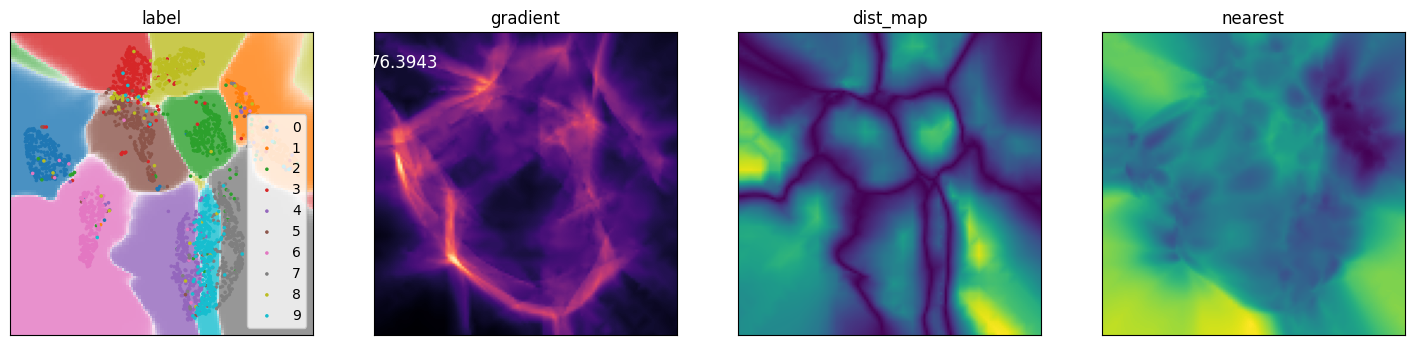

In [6]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [7]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
slow strategy
slow strategy
slow strategy


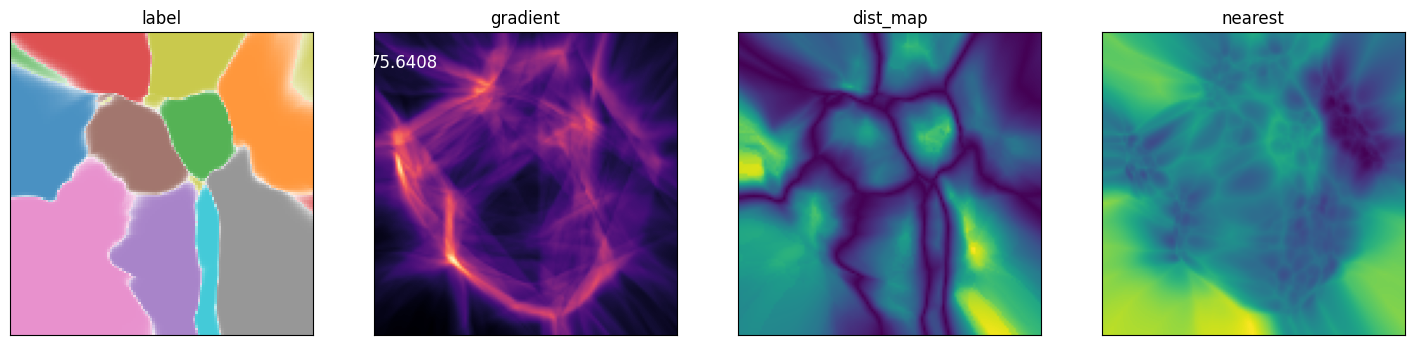

In [8]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
0.5175032615661621
fast strategy
threshold_abs: 42.18138732910157
1.6086580753326416


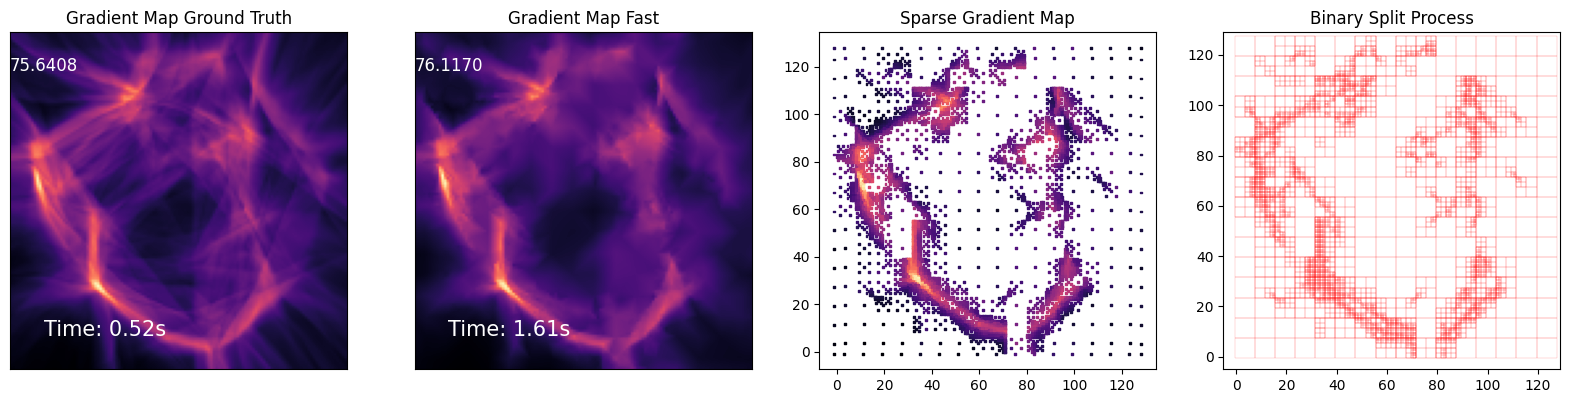

In [19]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 128
threshold = 0.2
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=16, threshold=threshold) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

fig.savefig('figures/grad_map.pdf', dpi=300)


In [10]:
# conten_list = ['label', 'gradient_reduced', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 150
# # builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# # builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)
# _, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, reduced=True) ## threshold at most 0.2
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

# threshold = 0
# for item in sparse:
#     if item[-2] > threshold and item[-1] > threshold:
#         w, h = item[-1], item[-2]
#         ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
#         # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
#         # ax.set_xlim(0, GRID)
#         # ax.set_ylim(0, GRID)
#     # else:
#     #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
# ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# # fig.savefig('results/figures/spares.pdf', dpi=300)

slow strategy
fast strategy
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


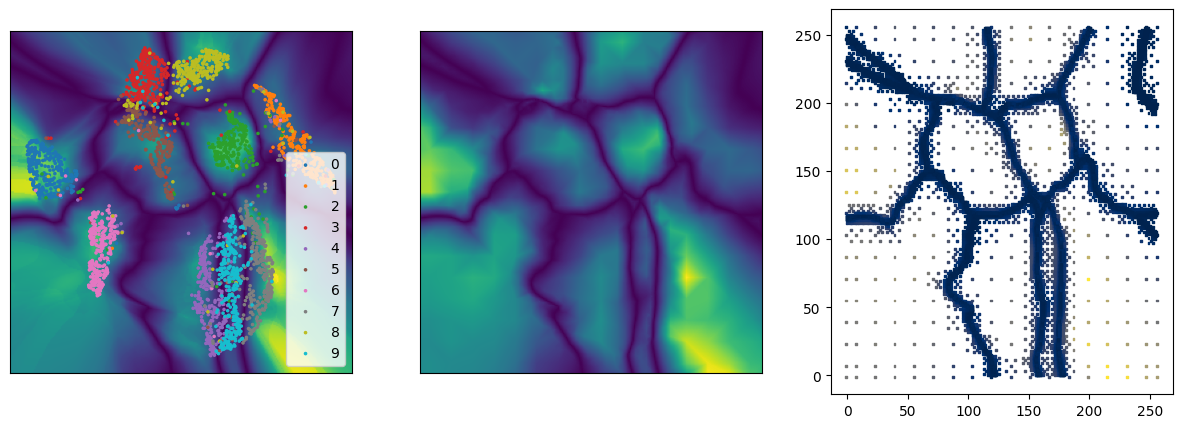

In [11]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_dist_map(ax[0],  fast=False, grid=256)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=16)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)


slow strategy
fast strategy
threshold_abs: 1.3083878606916368


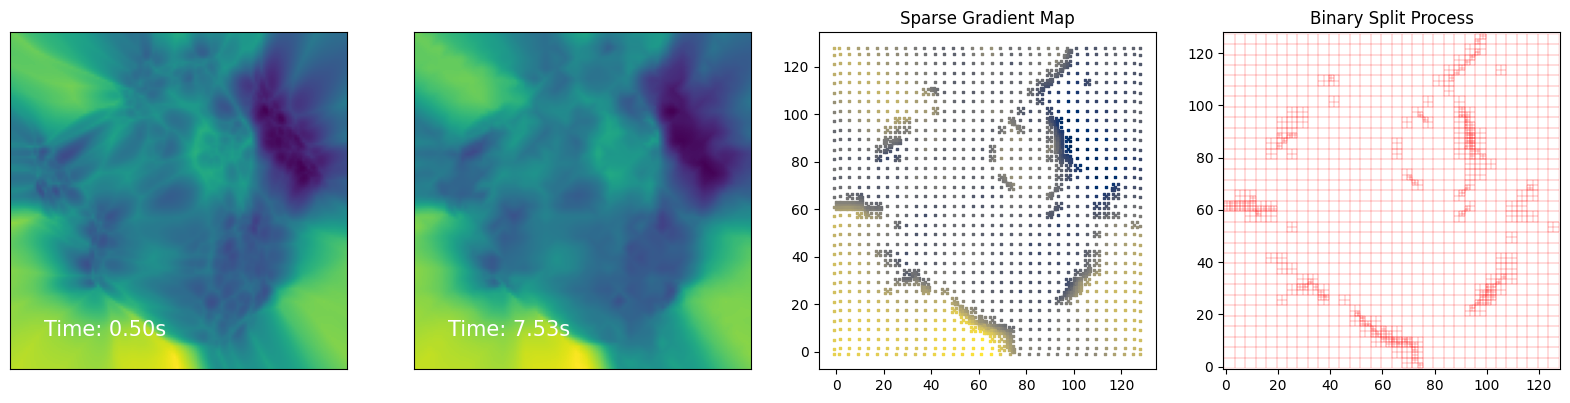

In [21]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 128

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.2)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(-1, GRID), ylim=(-1, GRID))

fig.savefig('figures/near2neighor.pdf', dpi=300)
